### Hand gesture recognition - Kaggle
It is based in a collection of near-infrared images of ten distinct hand gestures.
https://www.kaggle.com/benenharrington/hand-gesture-recognition-database-with-cnn

In [3]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
wk_dir = os.path.abspath(os.path.dirname('__file__'))

In [9]:
lookup = dict()
reverselookup = dict()
for i, j in enumerate(os.listdir(wk_dir + '/images/kaggle/leapGestRecog/00/')):
    if not j.startswith('.'): # to not run hidden folders
        lookup[j] = i
        reverselookup[i] = j
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

#### Bulding a dataset x_data and y_data
Since the images are quite large and are coming from an infra-red sensor, there's nothing really lost in converting them to greyscale and resizing to speed up the computations.

In [19]:
x_data, y_data = [], []
for counter, i in enumerate(range(0, 10)): # Loop over the ten top-level folders
    for j in os.listdir(wk_dir + '/images/kaggle/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            for sub_counter, k in enumerate(os.listdir(wk_dir + '/images/kaggle/leapGestRecog/0' + 
                                str(i) + '/' + j + '/')):
                                # Loop over the images
                img = Image.open(wk_dir + '/images/kaggle/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr)
            y_values = np.full((sub_counter + 1, 1), lookup[j]) 
            y_data.append(y_values)
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(-1, 1) # Reshape to be the correct size

In [21]:
print(x_data.shape)
print(y_data.shape)

(20000, 120, 320)
(20000, 1)


#### Displaying one image of each of the gestures

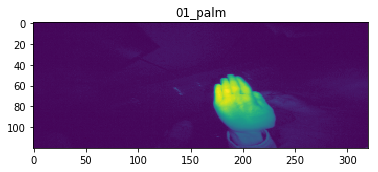

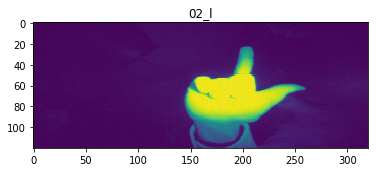

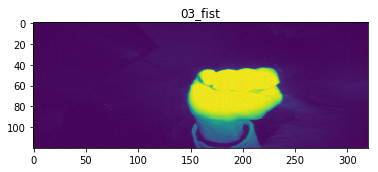

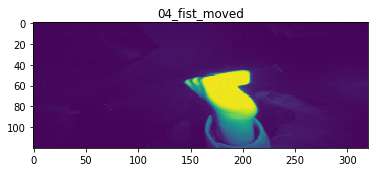

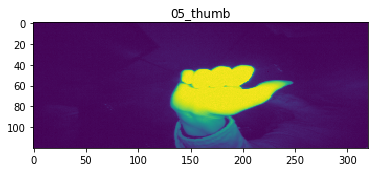

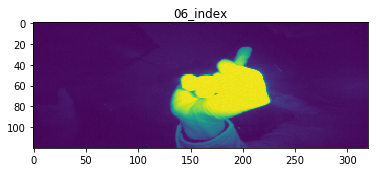

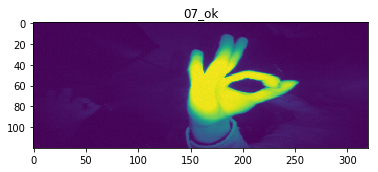

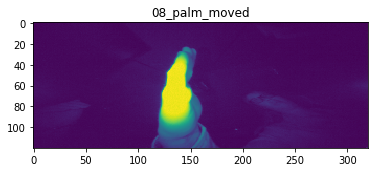

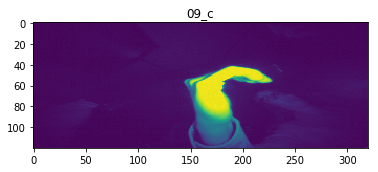

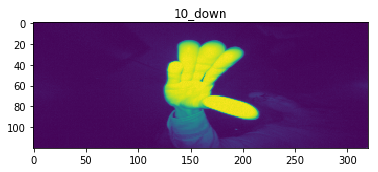

In [20]:
from random import randint


for i in range(0, 10):
    plt.imshow(x_data[i*200 + randint(0, 200), :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [23]:
# Converting y_data to a one-hot format
import keras


y_data = keras.utils.to_categorical(y_data)
print(y_data.shape)

(20000, 10)


Using TensorFlow backend.


In [25]:
y_data[0,:]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [26]:
# x_data has to be reshaed to the format [batch, height, width, channels]
x_data = x_data.reshape((-1,120,320,1))
# and scaled to [0-1]
x_data = x_data / x_data.max()

In [29]:
from sklearn.model_selection import train_test_split


x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

#### The model is built in keras

In [30]:
from keras import layers
from keras import models


model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


#### The model can be fitted

In [31]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Instructions for updating:
Use tf.cast instead.
Train on 16000 samples, validate on 2000 samples
Epoch 1/10
16000/16000 [==============================] - 264s 17ms/step - loss: 0.3152 - acc: 0.9044 - val_loss: 0.0064 - val_acc: 0.9985
Epoch 2/10
16000/16000 [==============================] - 18s 1ms/step - loss: 0.0173 - acc: 0.9959 - val_loss: 0.0013 - val_acc: 0.9995
Epoch 3/10
16000/16000 [==============================] - 18s 1ms/step - loss: 0.0117 - acc: 0.9980 - val_loss: 1.5323e-04 - val_acc: 1.0000
Epoch 4/10
16000/16000 [==============================] - 18s 1ms/step - loss: 0.0048 - acc: 0.9984 - val_loss: 1.9920e-04 - val_acc: 1.0000
Epoch 5/10
16000/16000 [==============================] - 18s 1ms/step - loss: 0.0047 - acc: 0.9991 - val_loss: 3.5868e-06 - val_acc: 1.0000
Epoch 6/10
16000/16000 [==============================] - 18s 1ms/step - loss: 0.0025 - acc: 0.9996 - val_loss: 0.0011 - val_acc: 0.9995
Epoch 7/10
16000/16000 [==============================] - 18s 1ms/s

#### Testing on the test set

In [32]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

2000/2000 [==============================] - 1s 556us/step
Accuracy:0.9995
